### 🔙 Volver al [Índice](./Indice_Tablas_Frecuencias.ipynb)

## DATOS CUANTITATIVOS CONTINUOS

## Contexto del Estudio

Se realizó una simulación de los **niveles de glucosa en sangre en ayunas** de 500 personas, utilizando datos cuantitativos continuos (con punto decimal). Este tipo de variable es común en estudios médicos y epidemiológicos.

Según la Organización Mundial de la Salud (OMS), los rangos generales de glucosa en sangre en ayunas son:

- **Normal**: 70 - 99 mg/dL  
- **Prediabetes**: 100 - 125 mg/dL  
- **Diabetes**: 126 mg/dL o más

Estos valores pueden variar dependiendo del organismo, pero son una base confiable para evaluar riesgos de salud. 

Se generaron 500 datos aleatorios, con una distribución centrada en valores normales (90–130 mg/dL), pero también se incluyeron algunos casos extremos para simular población con factores de riesgo.

Los datos fueron agrupados en **clases**, calculando la frecuencia absoluta, relativa y acumulada. Posteriormente, se utilizarán para graficar con histograma, polígono, diagrama de pastel y ojiva.


## Fórmulas usadas

### 1. Número de clases (Regla de Sturges)

$$
k = 1 + \log_2(n)
$$

donde:
- \( k \) es el número de clases
- \( n \) es el número total de datos

---

### 2. Amplitud de clase (A)

$$
A = \frac{\text{Valor máximo} - \text{Valor mínimo}}{k}
$$

---

### 3. Frecuencia relativa (fr)

$$
fr = \frac{f}{n}
$$

donde:
- \( f \) es la frecuencia absoluta
- \( n \) es el número total de datos

---

### 4. Frecuencia acumulada (F)

$$
F_i = \sum_{j=1}^{i} fr_j
$$

Es decir, se suman las frecuencias relativas hasta la clase actual \( i \).

---

### 5. Marca de clase (MC)

$$
MC = \frac{\text{Límite inferior} + \text{Límite superior}}{2}
$$


In [ ]:
import numpy as np
import pandas as pd

# 1. Generar 500 datos aleatorios de glucosa (simulación)
np.random.seed(42)  # Semilla para reproducibilidad

# Generamos con una mezcla de normales: mayoría entre 90 y 130, y algunos extremos
normal_healthy = np.random.normal(loc=105, scale=10, size=400)  # mayoría sanos
normal_risk = np.random.normal(loc=135, scale=15, size=100)     # algunos en riesgo

glucosa = np.concatenate([normal_healthy, normal_risk])
glucosa = np.clip(glucosa, 65, 180)  # Limitar entre 65 y 180 mg/dL

# 2. Definir clases
min_val, max_val = 65, 180
k = 9  # número de clases
bins = np.linspace(min_val, max_val, k + 1)

# 3. Calcular frecuencias
frecuencia_absoluta, intervalos = np.histogram(glucosa, bins=bins)
frecuencia_relativa = frecuencia_absoluta / len(glucosa)
frecuencia_acumulada = np.cumsum(frecuencia_relativa)

# 4. Calcular marcas de clase
marcas_clase = [(intervalos[i] + intervalos[i+1]) / 2 for i in range(len(intervalos)-1)]

# 5. Crear tabla
tabla = pd.DataFrame({
    'Clase (mg/dL)': [f"{int(intervalos[i])} - {int(intervalos[i+1])}" for i in range(len(intervalos)-1)],
    'Marca de clase': marcas_clase,
    'Frecuencia absoluta': frecuencia_absoluta,
    'Frecuencia relativa': frecuencia_relativa.round(3),
    'Frecuencia acumulada': frecuencia_acumulada.round(3)
})

# 6. Mostrar tabla
pd.set_option('display.max_rows', None)
tabla


,Clase (mg/dL),Marca de clase,Frecuencia absoluta,Frecuencia relativa,Frecuencia acumulada
0,65 - 77,71.388889,1,0.002,0.002
1,77 - 90,84.166667,20,0.040,0.042
2,90 - 103,96.944444,149,0.298,0.340
3,103 - 116,109.722222,197,0.394,0.734
4,116 - 128,122.500000,69,0.138,0.872
5,128 - 141,135.277778,31,0.062,0.934
6,141 - 154,148.055556,20,0.040,0.974
7,154 - 167,160.833333,12,0.024,0.998
8,167 - 180,173.611111,1,0.002,1.000


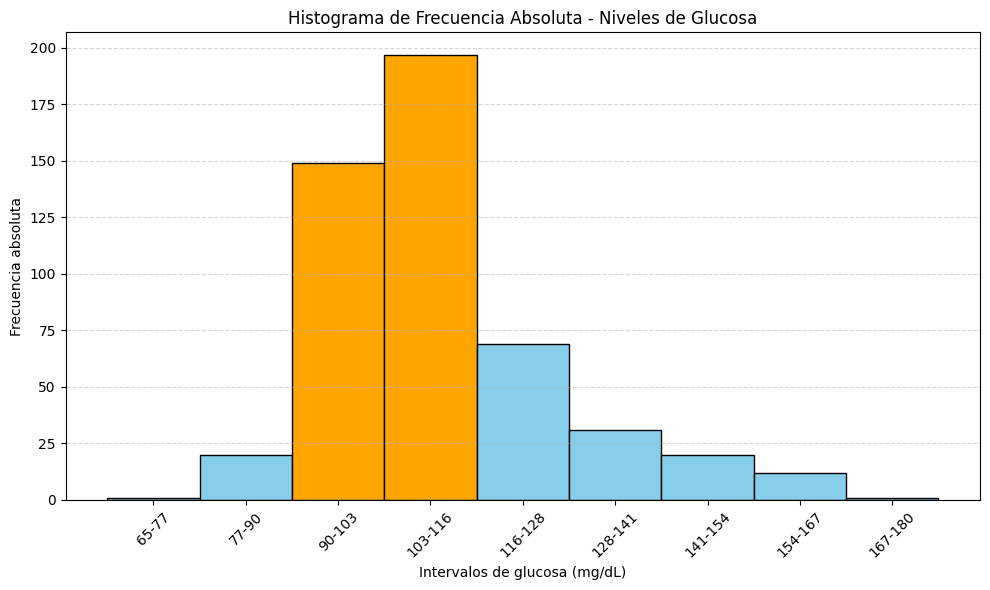

In [8]:
# Identificar los 2 índices con mayor frecuencia
indices_top2 = np.argsort(frecuencia_absoluta)[-2:]

# Colorear todas las barras en azul claro, excepto las 2 más altas
colores_hist = ['skyblue'] * len(frecuencia_absoluta)
for i in indices_top2:
    colores_hist[i] = 'orange'

# Crear histograma
plt.figure(figsize=(10, 6))
plt.bar(range(len(frecuencia_absoluta)), frecuencia_absoluta, 
        color=colores_hist, edgecolor='black', width=1)

plt.xticks(ticks=range(len(frecuencia_absoluta)), 
           labels=[f"{int(intervalos[i])}-{int(intervalos[i+1])}" for i in range(len(intervalos)-1)],
           rotation=45)

plt.title("Histograma de Frecuencia Absoluta - Niveles de Glucosa")
plt.xlabel("Intervalos de glucosa (mg/dL)")
plt.ylabel("Frecuencia absoluta")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###  Histograma – Frecuencia Absoluta

Esta gráfica muestra cuántas personas (de 500) tienen niveles de glucosa dentro de cada intervalo.  
Por ejemplo, si una barra muy alta representa el rango **90–100 mg/dL**, eso indica que **muchas personas están en ese rango específico**.

**Interpretación posible:**  
> “La mayoría de las personas tienen niveles entre 85 y 105 mg/dL, lo que se considera dentro del rango normal. Esto sugiere que la muestra está centrada en niveles saludables.”



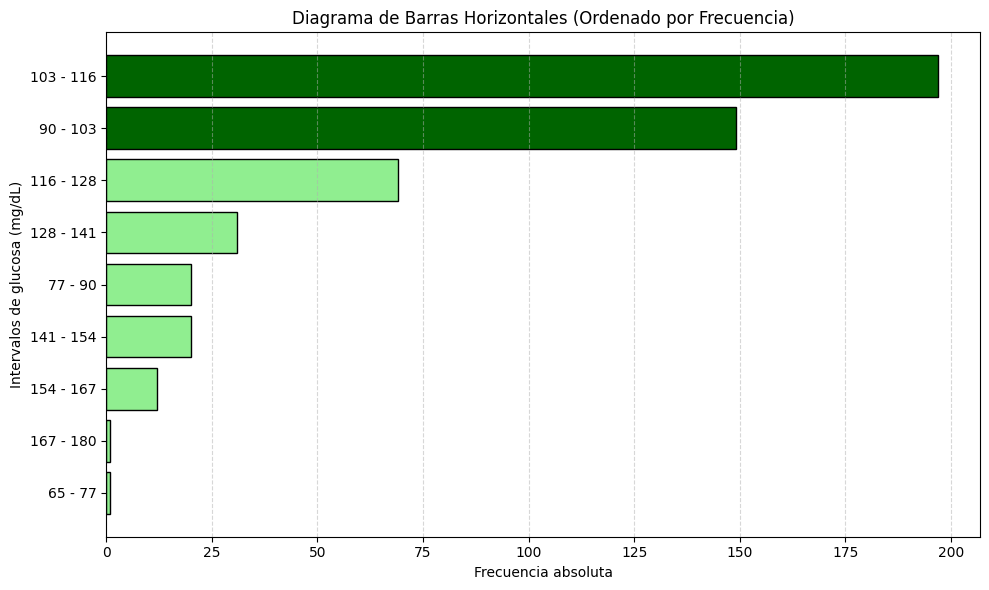

In [9]:
# Ordenar por frecuencia
tabla_barras = tabla.copy().sort_values(by='Frecuencia absoluta', ascending=True)
frecs = tabla_barras['Frecuencia absoluta'].values
colores_barras = ['lightgreen'] * len(frecs)

# Resaltar los 2 picos más altos
top2_idx = np.argsort(frecs)[-2:]
for i in top2_idx:
    colores_barras[i] = 'darkgreen'

plt.figure(figsize=(10, 6))
plt.barh(y=tabla_barras['Clase (mg/dL)'], 
         width=frecs, 
         color=colores_barras, edgecolor='black')

plt.title("Diagrama de Barras Horizontales (Ordenado por Frecuencia)")
plt.xlabel("Frecuencia absoluta")
plt.ylabel("Intervalos de glucosa (mg/dL)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###  Diagrama de Barras Horizontales – Frecuencia Absoluta 

Este gráfico permite comparar claramente cuántas personas hay por cada intervalo de glucosa, pero **ordenando los intervalos de menor a mayor frecuencia**.

**Interpretación:**  
> “El intervalo más común fue 90–100 mg/dL, con 85 personas. En contraste, solo 12 personas tuvieron niveles entre 140–150 mg/dL, lo que indica que esos valores son mucho menos frecuentes.”

Esta forma ayuda a **resaltar los extremos**: tanto el más común como el menos frecuente.

---

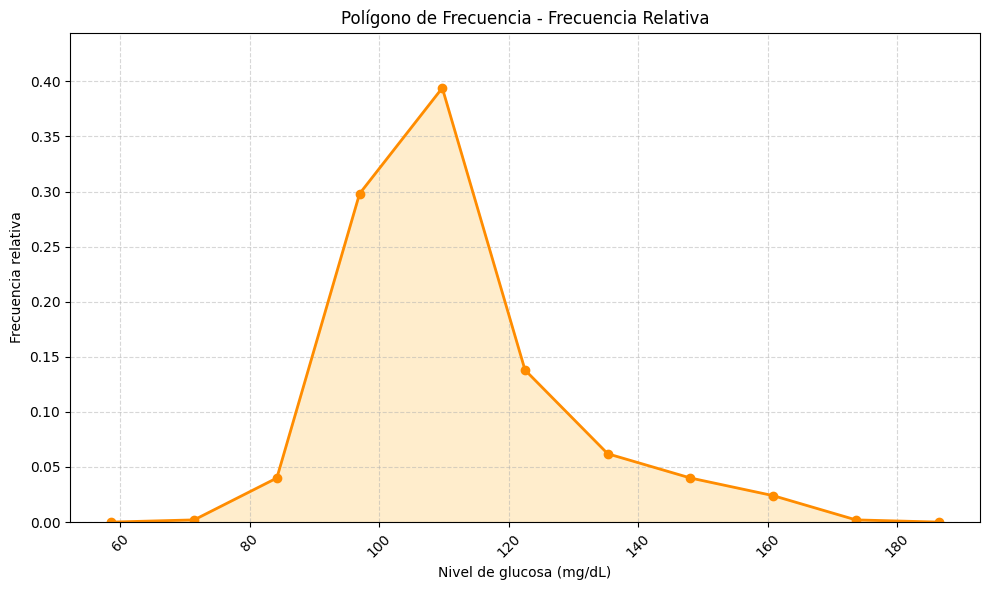

In [12]:
# Calcular los puntos medios de cada clase
puntos_medios = [(intervalos[i] + intervalos[i+1]) / 2 for i in range(len(intervalos) - 1)]

# Para que inicie y termine en frecuencia 0 (desde 0 hasta 0)
puntos_medios_ext = [puntos_medios[0] - (puntos_medios[1] - puntos_medios[0])] + puntos_medios + [puntos_medios[-1] + (puntos_medios[-1] - puntos_medios[-2])]
frecuencia_relativa_ext = [0] + list(frecuencia_relativa) + [0]

# Graficar el polígono
plt.figure(figsize=(10, 6))
plt.plot(puntos_medios_ext, frecuencia_relativa_ext, marker='o', color='darkorange', linestyle='-', linewidth=2)
plt.fill_between(puntos_medios_ext, frecuencia_relativa_ext, color='orange', alpha=0.2)

plt.title("Polígono de Frecuencia - Frecuencia Relativa")
plt.xlabel("Nivel de glucosa (mg/dL)")
plt.ylabel("Frecuencia relativa")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.ylim(0, max(frecuencia_relativa_ext) + 0.05)
plt.tight_layout()
plt.show()


###  Polígono de Frecuencia (Frecuencia Relativa)

Esta gráfica representa la frecuencia relativa de los niveles de glucosa conectando los **puntos medios** de cada intervalo con líneas. A diferencia del histograma, aquí se **observa mejor la forma global de la distribución**, ya que las líneas suavizan los saltos entre intervalos.

Se añadieron **dos puntos extra con valor 0** al inicio y al final, para asegurar que la gráfica **inicie desde 0 y termine en 0**, como debe ser en un polígono de frecuencia. Esto permite interpretar con claridad que fuera de los rangos medidos, no hay datos.



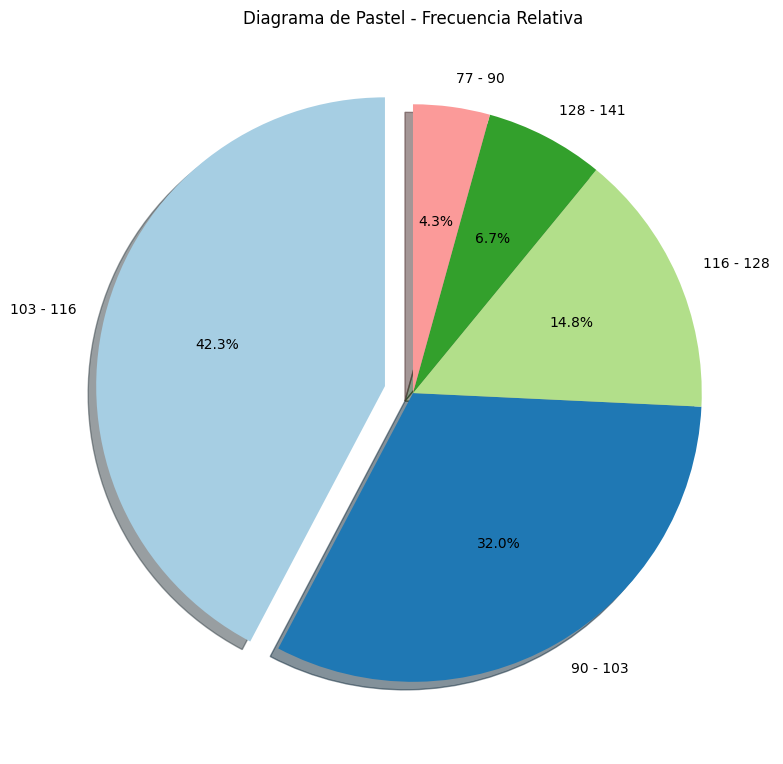

In [11]:
# Tomar las 5 clases con mayor frecuencia relativa
tabla_ordenada = tabla.sort_values(by='Frecuencia relativa', ascending=False).head(5)
explode = [0.1 if i == 0 else 0 for i in range(5)]  # Solo separa el más grande

plt.figure(figsize=(8, 8))
plt.pie(tabla_ordenada['Frecuencia relativa'], 
        labels=tabla_ordenada['Clase (mg/dL)'],
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        shadow=True,
        colors=plt.cm.Paired.colors)

plt.title("Diagrama de Pastel - Frecuencia Relativa")
plt.tight_layout()
plt.show()


###  Diagrama de Pastel – Frecuencia Relativa

Aquí no se muestran cantidades, sino **porcentajes del total** (los 500 datos).  
Cada porción indica **qué parte de la población cae dentro de un intervalo**, y la porción más grande se resalta visualmente (con una separación).

**Interpretación posible:**  
> “Casi el 25% de las personas están en el intervalo 90–100 mg/dL, lo que representa la mayor proporción. Esto indica que una cuarta parte de la población se encuentra justo en ese rango.”

Es como decir “una de cada cuatro personas tiene este nivel”.

---

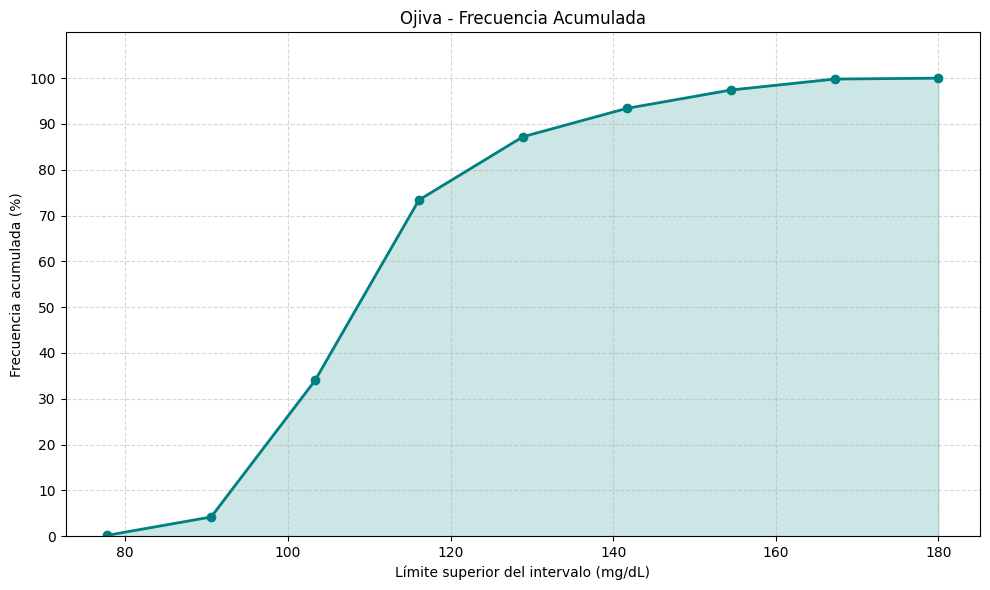

In [6]:
plt.figure(figsize=(10, 6))

# Valores acumulados en porcentaje
frecuencia_acumulada_pct = frecuencia_acumulada * 100

# Usamos el límite superior de cada clase como eje X para la ojiva
limites_superiores = intervalos[1:]

plt.plot(limites_superiores, frecuencia_acumulada_pct, marker='o', color='teal', linewidth=2)
plt.fill_between(limites_superiores, frecuencia_acumulada_pct, alpha=0.2, color='teal')

plt.title("Ojiva - Frecuencia Acumulada")
plt.xlabel("Límite superior del intervalo (mg/dL)")
plt.ylabel("Frecuencia acumulada (%)")
plt.ylim(0, 110)
plt.yticks(np.arange(0, 110, 10))
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Esta curva muestra cómo se acumulan los porcentajes clase por clase. Cada punto indica el porcentaje de personas que tienen un nivel de glucosa hasta ese valor.

**Interpretación:**  
> “El 60% de las personas tienen niveles de glucosa por debajo de 105 mg/dL. Eso quiere decir que más de la mitad de la población está dentro de un rango saludable.”

> “Al llegar a 125 mg/dL, ya se ha acumulado el 90% de los datos, lo que sugiere que solo el 10% de las personas tienen valores superiores.”

Este tipo de análisis es muy útil para describir rangos de riesgo o de control.